# **Case Study - Masonry Arch Collapse Load Prediction**

--------------------
## **Context**
--------------------

A study at Napier University found that three nominally identical single span masonry arch bridges subjected to the same load did not collapse at the same load. This was believed to have occured because of differences in workmanship such as difference in mortar size or geometric differences. There have been alot of proposals of how to study arch action and predict collapse. Each has its merits. Statistical analysis was turned to as a possible way of studying the phenomenon observed in otherwise similar structures collapsing at different loads. Stochastic simulations such as Monte Carlo have been used to evaluate masory arch structures. The task is to identify patterns in characteristics of single span arched bridges and see which features contribute highest to collapse load. This way the design team can assign resources to improve the feature that is likely to lead to higher collapse load. The results can also be used to perform better inspection of old masonry arched structures for serviceability and inform repair work. So we are going to use this information distilled from past studies to **investigate to what extent material or geometric characteristics affect collapse load.** This information will be used for stronger and cheaper masonry arch design.

-----------------------
## **Objective**
-----------------------

* To identify the different factors that affect collapse load

------------------------------------
## **Dataset Description**
------------------------------------

The data contains information on existing and experimental bridges, actual collapse loads detail, geometric, and material characteristics.

* **bridge_name** - Bridge name
* **span_L_m** - bridge span in metres
* **span_to_rise** - ratio of span to rise
* **width_m** - Overall width of the structure
* **d_ring_thickness_m** - thickness of arch in metres
* **arch_ring_profile** - type of arch, 1-segmental, 2-parabolic
* **h_crown_backfill_depth_m** - backfill in metres
* **bulk_unit_weight_kNpm3** - bulk unit weight of backfill (in kN/m3)
* **Elastic_Modulus_Mpa** - also Young's Modulus
* **arch_tensile_strenth_Mpa** - strength of brick and mortar bond in mega Pascals
* **r/L** - ratio of rise to span
* **masonry_density_kNpm3** -bulk unit weight of masonry (kN/m3)
* **d/L** - ratio of ring depth to span
* **h/d** - ratio crown fill depth to ring depth
* **actual_collapse_load_KNpm** - actual collapse load in kilo Newtons per metre



## **Importing the libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import LeaveOneOut, train_test_split

# Algorithms to use
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve,recall_score, accuracy_score, r2_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the Dataset**

In [3]:
# Loading the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/project_arch_collapse load/brick_arch_collapse_load - Copy.xlsx')

In [4]:
df.head()

,bridge_name,span_L_m,rise_r_m,span_to_rise,width_m,d_ring_thickness_m,arch_ring_profile,h_crown_backfill_depth_m,bulk_unit_weight_kNpm3,Elastic_Modulus_Mpa,arch_tensile_strength_Mpa,arch_compressive_strength_Mpa,r/L,masonry_density_kNpm3,d/L,h/d,actual_collapse_load_KNpm
0,2m semicircircular arch bridge,2.000,1.000,2.000000,1.79,0.1025,segmental,0.150,21.50,5000,0.790,5.00,0.500000,21.5,0.051250,1.463415,20.0
1,Bridgemill,18.290,2.840,6.440141,8.30,0.7110,parabolic,0.203,20.00,5000,0.220,5.00,0.155276,21.0,0.038874,0.285513,361.0
2,Strathmashie,9.425,2.990,3.152174,5.81,0.6000,segmental,0.410,20.00,5000,0.250,16.00,0.317241,26.0,0.063660,0.683333,228.0
3,Barlae,9.865,1.695,5.820059,9.80,0.4500,segmental,0.295,20.00,5000,0.330,7.00,0.171820,21.0,0.045616,0.655556,296.0
4,SR4-A,2.000,0.500,4.000000,1.00,0.1025,segmental,0.150,14.86,6800,0.542,8.82,0.250000,18.0,0.051250,1.463415,21.0


### **Checking the info of the dataset**

In [5]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bridge_name                    14 non-null     object 
 1   span_L_m                       14 non-null     float64
 2   rise_r_m                       14 non-null     float64
 3   span_to_rise                   14 non-null     float64
 4   width_m                        14 non-null     float64
 5   d_ring_thickness_m             14 non-null     float64
 6   arch_ring_profile              14 non-null     object 
 7   h_crown_backfill_depth_m       14 non-null     float64
 8   bulk_unit_weight_kNpm3         14 non-null     float64
 9   Elastic_Modulus_Mpa            14 non-null     int64  
 10  arch_tensile_strength_Mpa      14 non-null     float64
 11  arch_compressive_strength_Mpa  14 non-null     float64
 12  r/L                            14 non-null     float

**Observations:**

- There are **14 observations and 19 columns** in the dataset.
- some columns have null values, i.e., **there are missing values in the data.**

**Let's check the unique values in each column**

In [6]:
# Checking unique values in each column
df.nunique()

,0
bridge_name,14
span_L_m,9
rise_r_m,11
span_to_rise,10
width_m,11
d_ring_thickness_m,9
arch_ring_profile,2
h_crown_backfill_depth_m,9
bulk_unit_weight_kNpm3,4
Elastic_Modulus_Mpa,6


**Observations:**

- **bridge_name is an identifier** which is unique for each observation and **we can drop this column** as it would not add any value to our analysis.

**Let's drop the column mentioned above** and define lists for numerical and categorical columns to explore them separately.

In [7]:
# Dropping the columns
df=df.drop(['bridge_name'],axis=1)

In [8]:
# Creating numerical columns
num_cols= ['span_L_m', 'rise_r_m', 'span_to_rise', 'width_m', 'd_ring_thickness_m',
          'h_crown_backfill_depth_m', 'bulk_unit_weight_kNpm3',
          'Elastic_Modulus_Mpa', 'arch_tensile_strength_Mpa',
          'r/L', 'masonry_density_kNpm3',
          'd/L', 'h/d', 'actual_collapse_load_KNpm']

# Creating categorical variables
cat_cols= ['arch_ring_profile']

## **Exploratory Data Analysis and Data Preprocessing**

### **Univariate analysis of numerical columns**



In [9]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
span_L_m,14.0,5.889429,4.764735,2.000000,2.000000,4.926000,8.693750,18.290000
rise_r_m,14.0,1.557714,1.329607,0.200000,0.625000,1.169500,1.680250,5.180000
span_to_rise,14.0,4.316858,2.136340,2.000000,3.057298,4.000000,5.036689,10.000000
width_m,14.0,4.128214,3.151671,0.750000,1.197500,3.090000,6.738750,9.800000
d_ring_thickness_m,14.0,0.304929,0.217232,0.102500,0.102500,0.281500,0.435000,0.711000
h_crown_backfill_depth_m,14.0,0.215286,0.088069,0.150000,0.150000,0.182500,0.238250,0.410000
bulk_unit_weight_kNpm3,14.0,18.402857,2.738701,14.860000,14.945000,20.000000,20.000000,21.500000
Elastic_Modulus_Mpa,14.0,6667.714286,1947.987341,4000.000000,5000.000000,6800.000000,6800.000000,11048.000000
arch_tensile_strength_Mpa,14.0,0.695214,0.364658,0.220000,0.478250,0.546000,1.000000,1.340000
r/L,14.0,0.283737,0.131443,0.100000,0.199201,0.250000,0.327189,0.500000


**Observations:**

- **Average arch ring thickness** is 300mm. It has a high range between 102.5mm to 701mm
- 50% of observations have a **span to rise** of 4. The maximum rise to span ratio.
- The **average arch tensile strength** which is also a measure of the strength of bond between mortar and brick.
- **The average collapse Load.** - is 186kN/m. It has a wide range of 16kN/m and a max of 645kN/m.

**Let's explore these variables in some more depth by observing their distributions**

In [10]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(num_cols, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: data
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize)                   # Creating the 2 subplots

    sns.boxplot(data = num_cols, x = feature, ax = ax_box2, showmeans = True, color = "violet") # Boxplot will be created and a Triangle will indicate the mean value of the column
    sns.histplot(data = num_cols, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.histplot(data = num_cols, x = feature, kde = kde, ax = ax_hist2) # To create histogram
    ax_hist2.axvline(num_cols[feature].mean(), color = "green", linestyle = "--")  # Add mean to the histogram
    ax_hist2.axvline(num_cols[feature].median(), color = "black", linestyle = "-") # Add median to the histogram

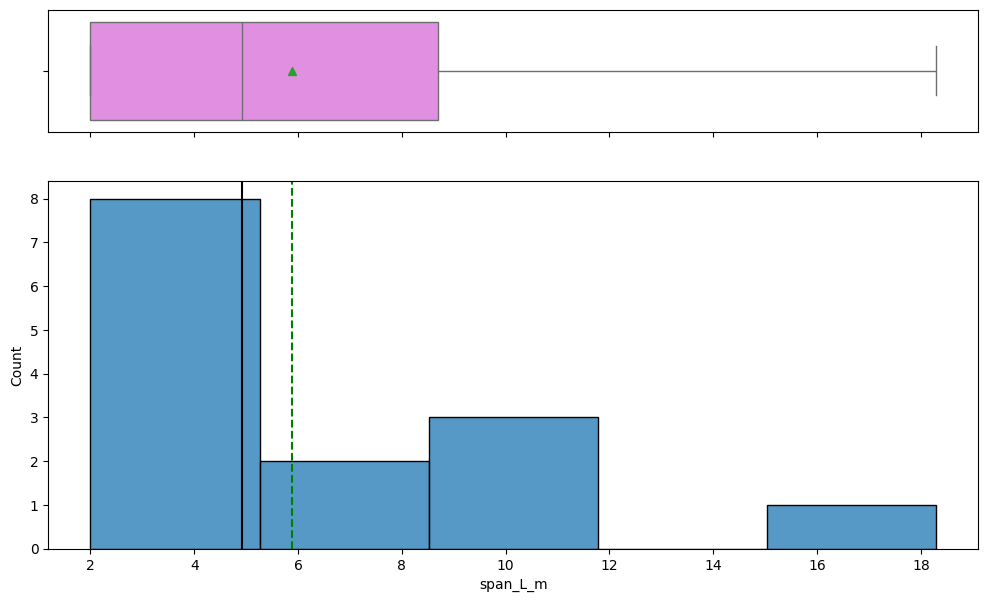

In [11]:
# Plot histogram and box-plot for 'span_L_m'
histogram_boxplot(df, 'span_L_m')

**Observations**
- The distribution of span right skewed ignoring the outlier
- from the box plot it appears there are extreme values

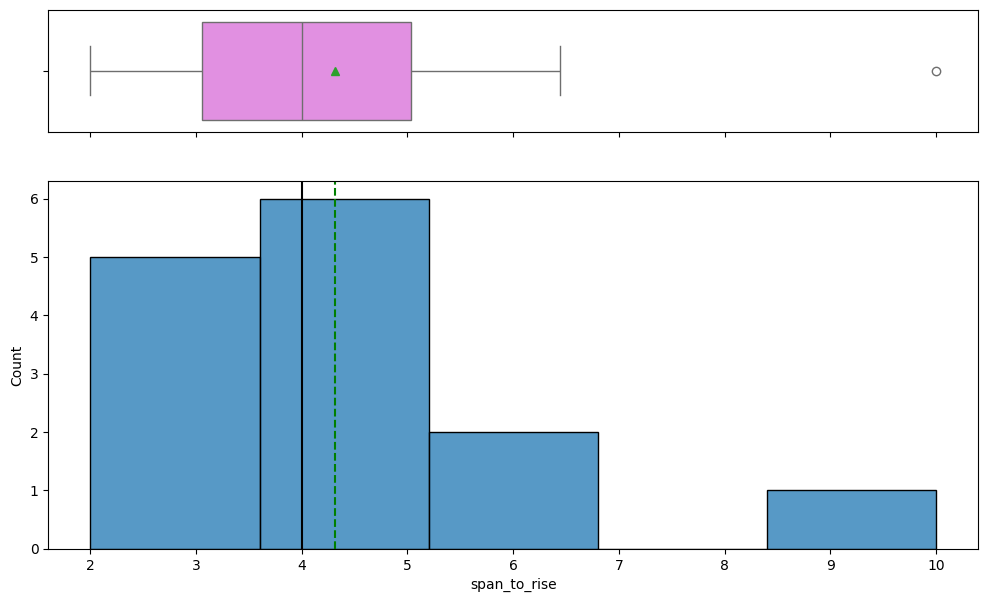

In [12]:
# Plot histogram and box-plot for 'span_to_rise'
histogram_boxplot(df, 'span_to_rise')

**Observations**
- the distribution of span to rise ratio is slighly right skewed
- from the box plot there is an outlier otherwise the data looks almost proportinate

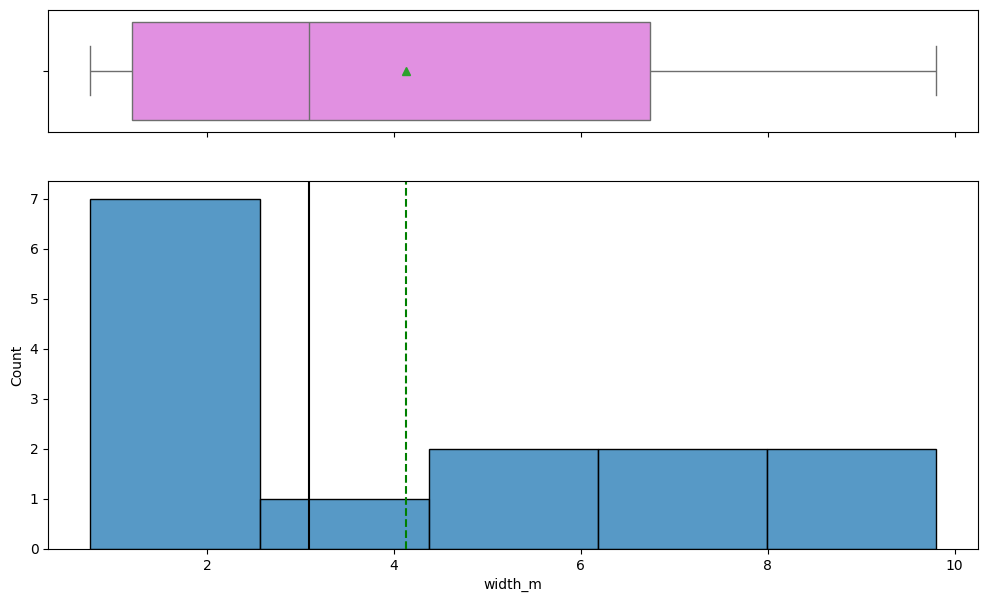

In [13]:
# Plot histogram and box-plot for 'width_m'
histogram_boxplot(df, 'width_m')

**Observations**
- Distribution of width is extremely skewed to the right
- from the box plot there are no outliers

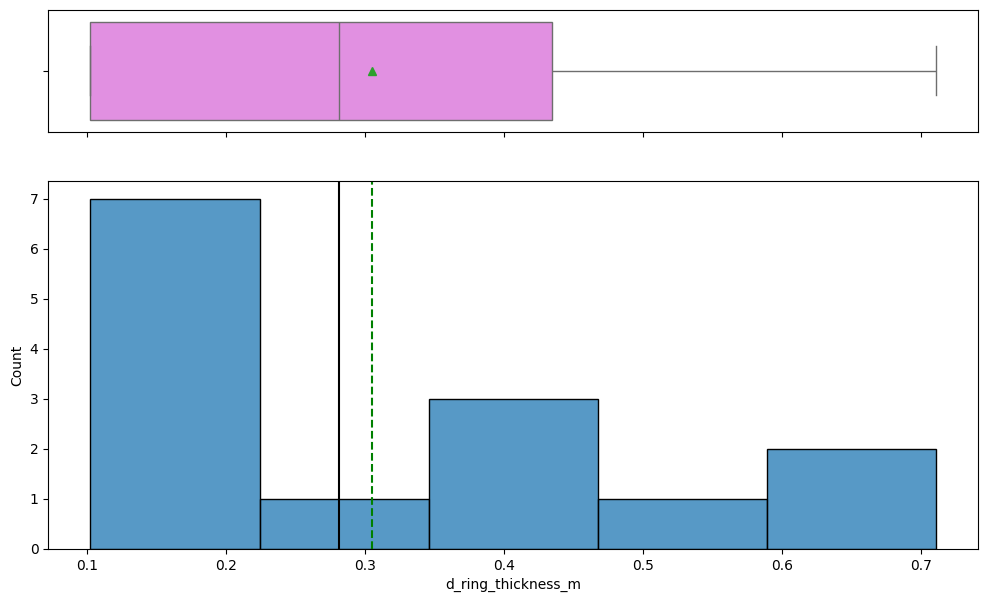

In [14]:
#Plot histogram and box-plot for 'd_ring_thickness_m'
histogram_boxplot(df, 'd_ring_thickness_m')

**Observations**
- ring thickness distribution exhibits eratic behaviour
- the box plot shows most of the data is above the average 300mm

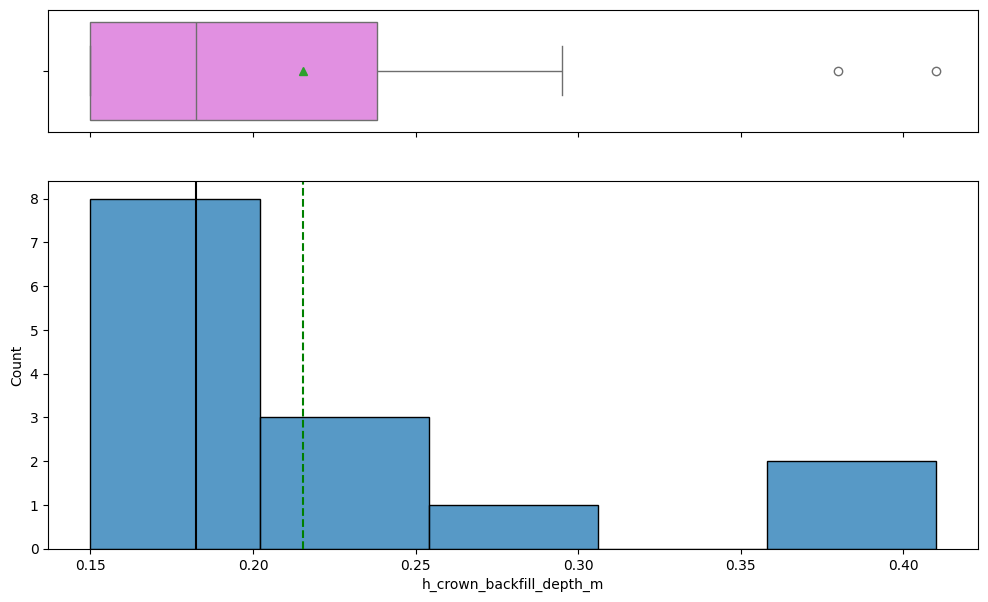

In [15]:
#Plot histogram and box-plot for 'h_crown_bacfill_depth_m'
histogram_boxplot(df, 'h_crown_backfill_depth_m')

**Observations**
- Distribution of depth from crown of backfill is right skewed
- from box-plot there are outliers

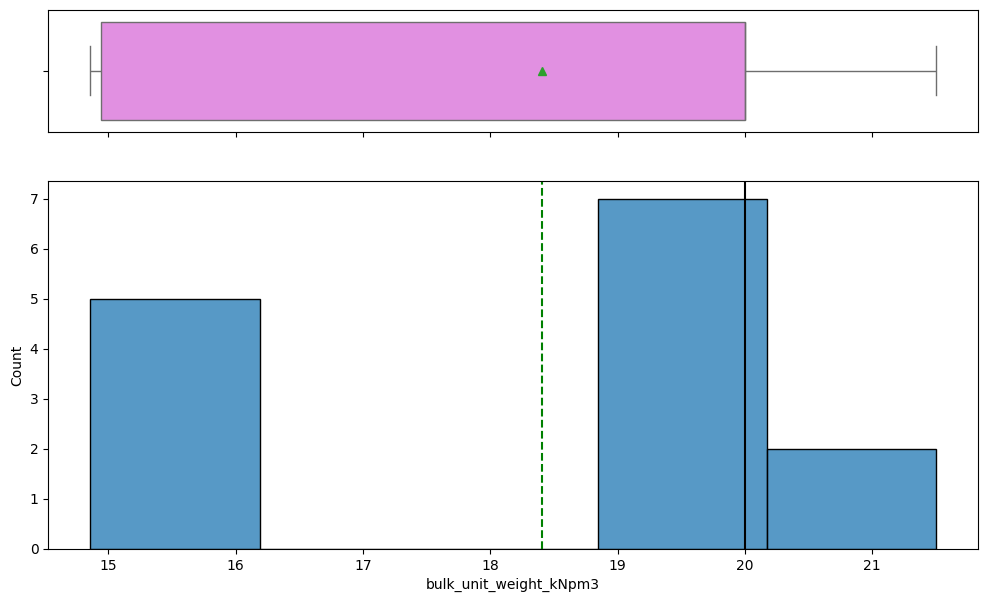

In [16]:
#Plot histogram and box-plot for 'd_ring_thickness_m'
histogram_boxplot(df, 'bulk_unit_weight_kNpm3')

**Observations**
- Distribution of bulk unit weight of backfill in kN/m3 is also extremely left skewed with no outliers

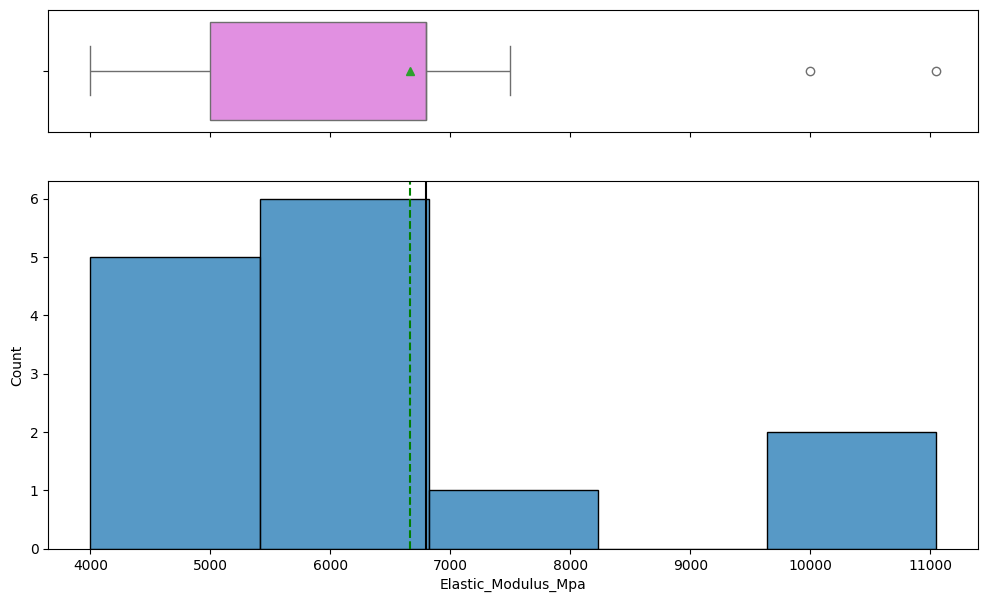

In [17]:
#Plot histogram and box-plot for 'Youngs Modulus'
histogram_boxplot(df, 'Elastic_Modulus_Mpa')

**Observations**
- Elastic modulus has a wide range of values from 4000MPa to 11000MPa.
- The box plot shows some outliers

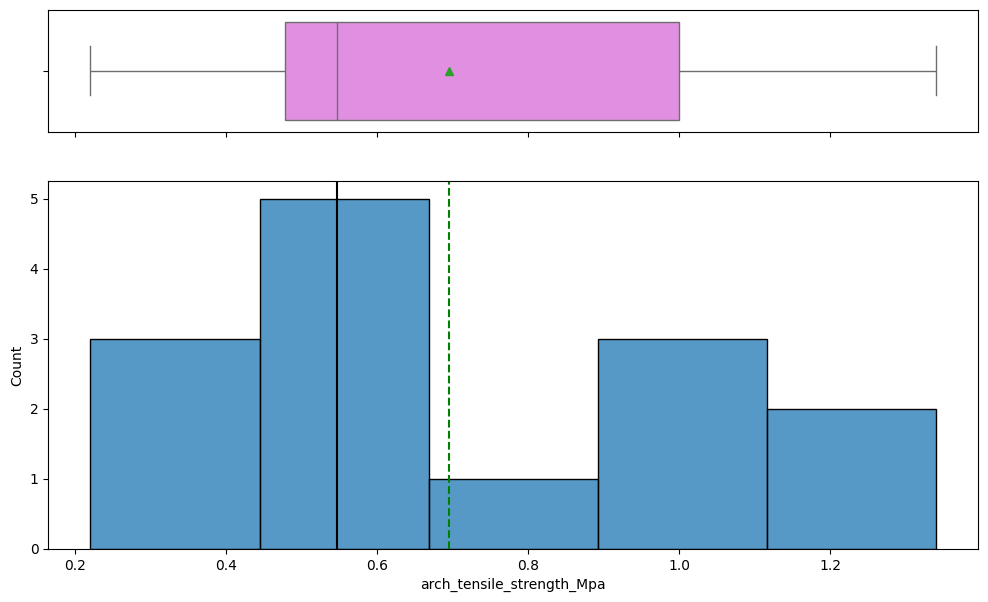

In [18]:
#Plot histogram and box-plot Tensile strengthe
histogram_boxplot(df, 'arch_tensile_strength_Mpa')

**Observations**
- The distribution of Tensile strength is right skewed with extreme values but no outliers

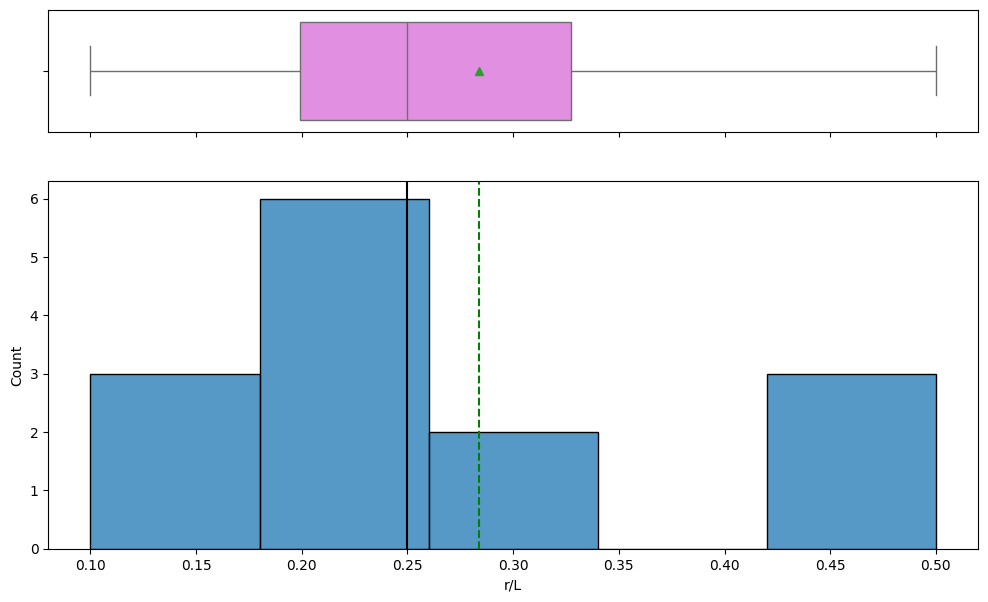

In [19]:
#Plot histogram and box-plot ratio r/L
histogram_boxplot(df, 'r/L')

**Observations**
- r/L ratio has an almost normal distribution ignoring the outlier

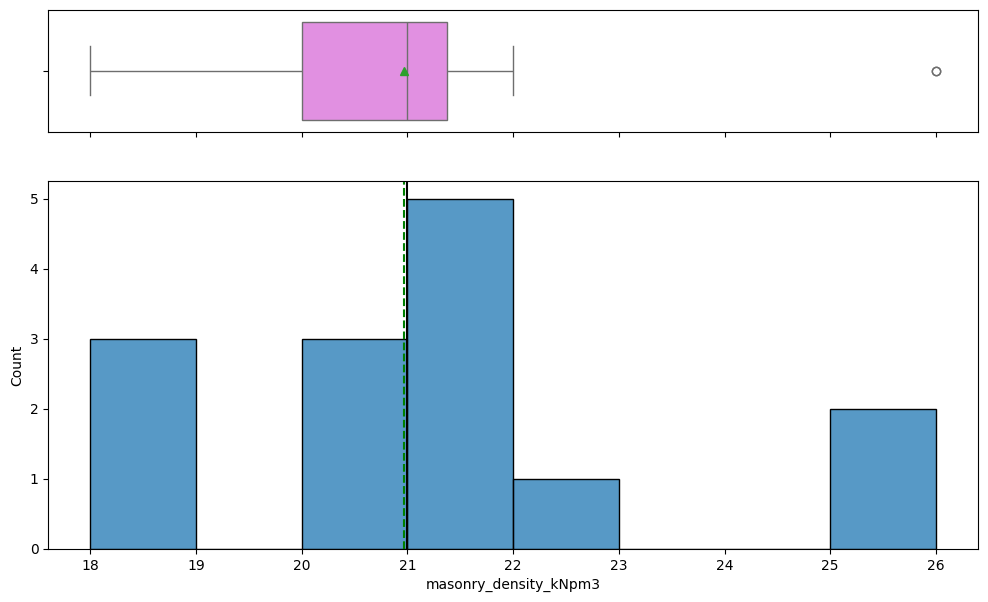

In [20]:
#Plot histogram and box-plot for masonry density
histogram_boxplot(df, 'masonry_density_kNpm3')

**Observations**
- The distribution of density of the block (kN/m3) is left skewed
- The box plot shows an extreme outlier

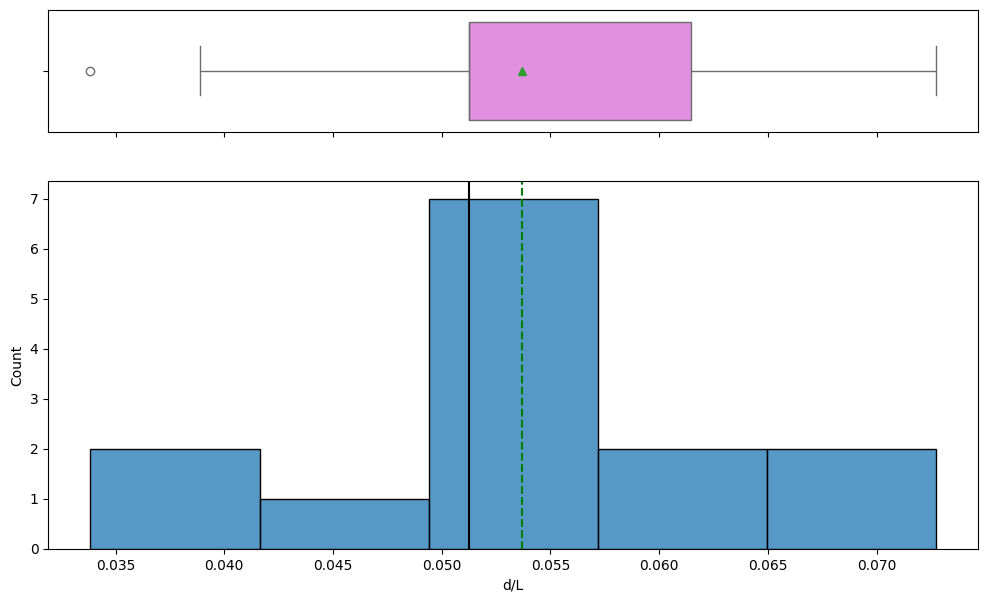

In [21]:
#Plot histogram and box-plot for ratio d/L
histogram_boxplot(df, 'd/L')

**Observations**
- d/L ratio which is ring thickness over span has a distribution that is almost normal
- the box-plot shows an outlier

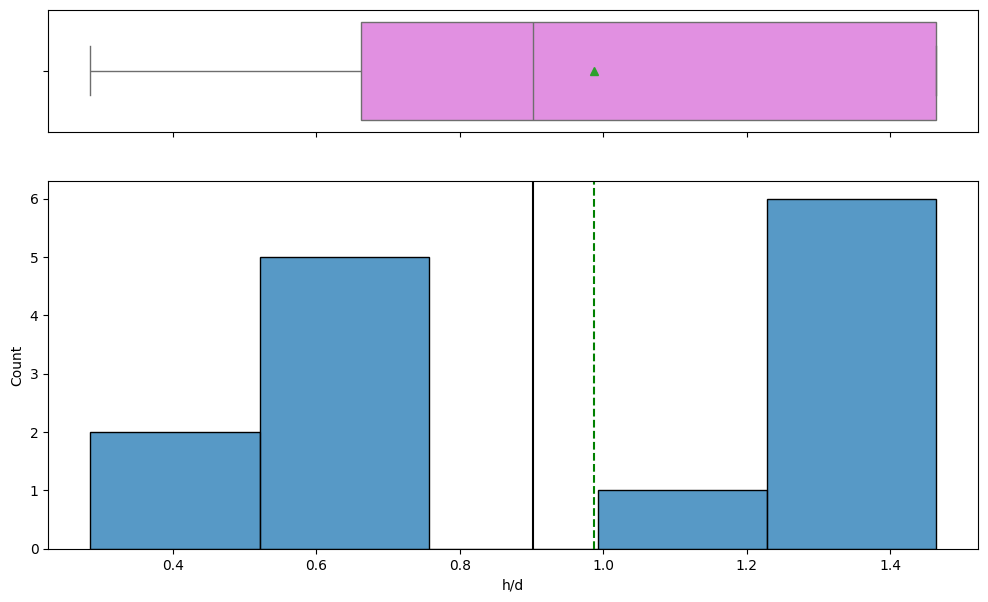

In [22]:
#Plot histogram and box-plot for ratio h/d
histogram_boxplot(df, 'h/d')

**Observations**
- h/d ratio of depth of backfill from crown to ring depth appears to be left skewed with no outliers

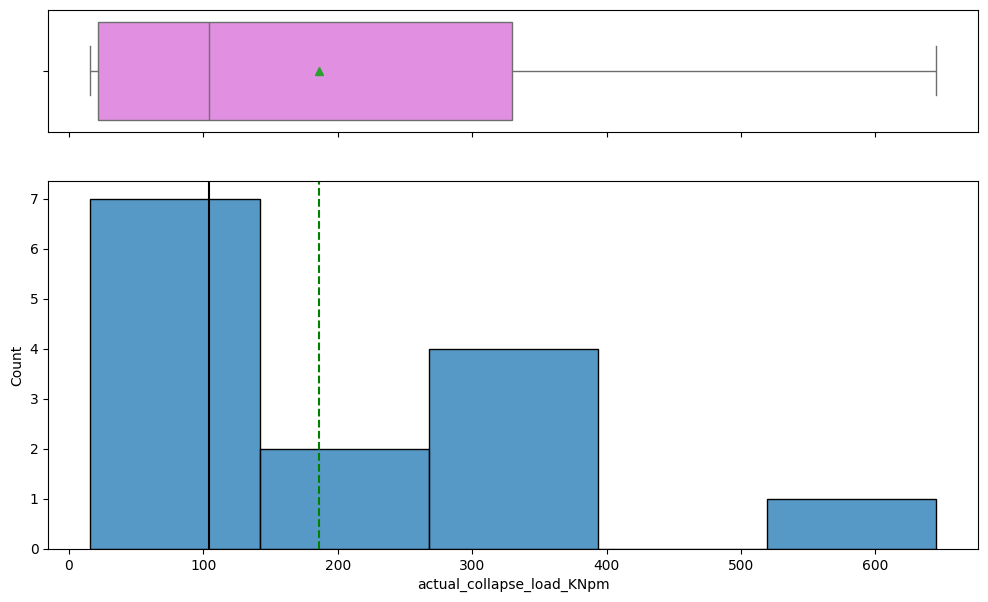

In [23]:
#Plot histogram and box plot for actual collapse load
histogram_boxplot(df, 'actual_collapse_load_KNpm')

**Observations**
- The distribution of actual collapse load(kN/m) is right skewed with a wide range of data from almost 20 t0 650+

**Overall Observations:**
- 60% of our data is right skewed and only one feature resembles normal distribution. We will have to scale the data before modeling.
- There are very few outliers observed.


### **Univariate analysis for categorical variables**

In [24]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

arch_ring_profile
segmental    0.857143
parabolic    0.142857
Name: proportion, dtype: float64
****************************************


**Observations:**

- **85% of observed archs are segmental** the term segmental has been used to refer to construction process where sections of the arch are assembled on site but in this case it refers to the profile as part of a circle

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how does actual collapse load relate with other categorical and numerical variables.

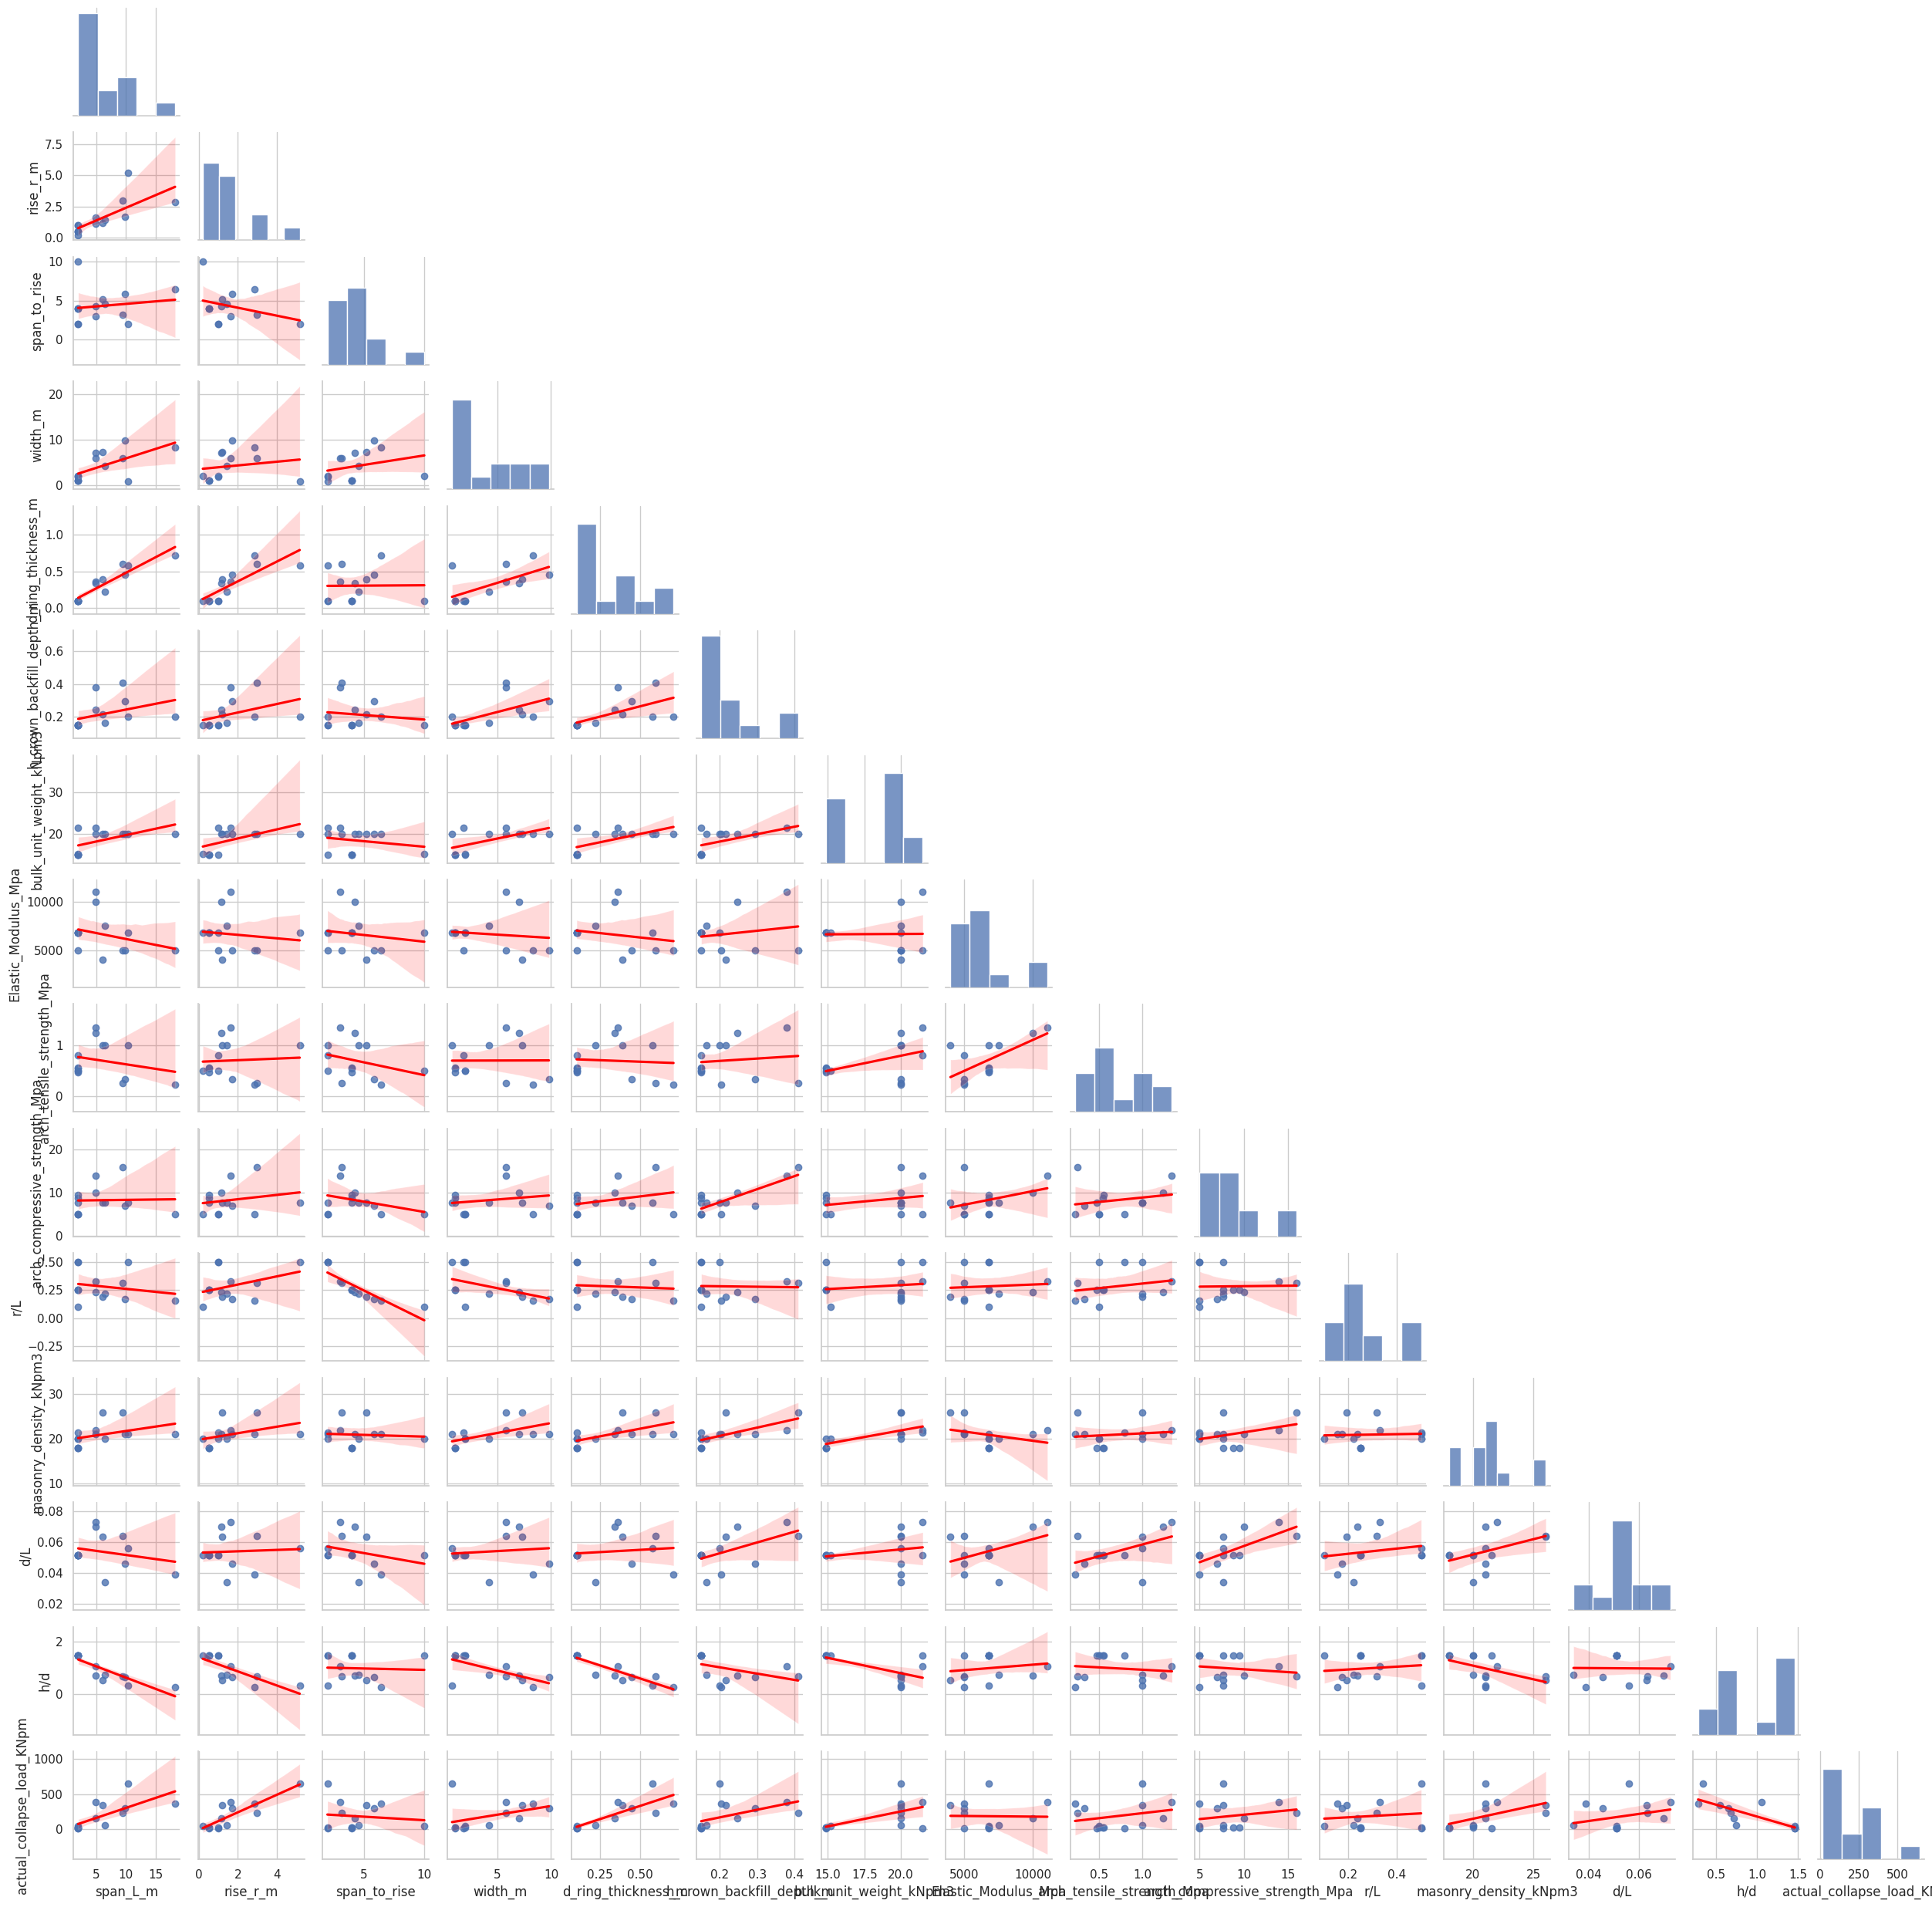

In [25]:
# Let us plot pair plot for the variables.

sns.set(style='ticks', color_codes=True)
sns.set(rc={'figure.figsize':(15,15)}) # Designing the size of the pairplot to accomodate the visualization of all the columns properly
# Let us plot pair plot for the variables.

sns.set(style='ticks', color_codes=True)
sns.set(rc={'figure.figsize':(15,15)}) # Designing the size of the pairplot to accomodate the visualization of all the columns properly
# Let us plot pair plot for the variables.

sns.set(style='ticks', color_codes=True)
sns.set(rc={'figure.figsize':(15,15)}) # Designing the size of the pairplot to accomodate the visualization of all the columns properly
# Let us plot pair plot for the variables.

sns.set(style='ticks', color_codes=True)
sns.set(rc={'figure.figsize':(15,15)}) # Designing the size of the pairplot to accomodate the visualization of all the columns properly
sns.set_style("whitegrid")

sns.pairplot(df, kind = 'reg', plot_kws={'line_kws':{'color': 'red'}}, corner=True, height=2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Adjust these values as needed
plt.show()

**Observations:**
    
- **Rise, span, arch thickness and depth from crown of backfill bulk unit show  positive relationship to collapse load**,
Putting the geometric aspects aside backfill depth if increased can contribute towards self weight which could lower the collapse load that is to say the arch would collapse under less strain.
- r/L which is the ratio between rise and span shows a negative relationship with span to rise ratio which is expected because they are the inverse of each other. I included both because the studies used them interchangeably.
- **Bridge width, ring thickness, span and rise exihibit a negative relationship with ratio h/d which is depth of fill from crown to the ring's thickness** for the ring thickness this is not unexpected since it is inversely related to the ratio and since the others are linearly related to it, the relationship follows.
- **Rise appears to have no relationship with the d/L ratio which is the size of ring to span** this is unexpected since the three variables show a positive relationship with actual collapse load
- **Compressive strength and tensile strength show a weak relationship** since the two represent opposite material properties.
- **Tensile strength is weakly related to collapse load.** This is unexpected given that most studies show failure of arch systems is caused by tensile stress exceeding allowable load

**Let's check the relationship between attrition and Numerical variables**

In [26]:
# Mean of numerical variables grouped by arch type
df.groupby(['arch_ring_profile'])[num_cols].mean()

,span_L_m,rise_r_m,span_to_rise,width_m,d_ring_thickness_m,h_crown_backfill_depth_m,bulk_unit_weight_kNpm3,Elastic_Modulus_Mpa,arch_tensile_strength_Mpa,r/L,masonry_density_kNpm3,d/L,h/d,actual_collapse_load_KNpm
arch_ring_profile,,,,,,,,,,,,,,
parabolic,11.596000,1.9970,5.343987,7.6725,0.527000,0.22450,20.000000,7500.0,0.730000,0.195345,21.000000,0.054423,0.501357,257.150
segmental,4.938333,1.4845,4.145670,3.5375,0.267917,0.21375,18.136667,6529.0,0.689417,0.298469,20.958333,0.053554,1.068420,174.595


**Observations:**
- It is worth noting **parabolic profile** archs seem to have a higher actual collapse load and accomodate wider spans

**What features exibit correlation to each other?**

### **Let's check the relationship between different numerical variables**

<Axes: >

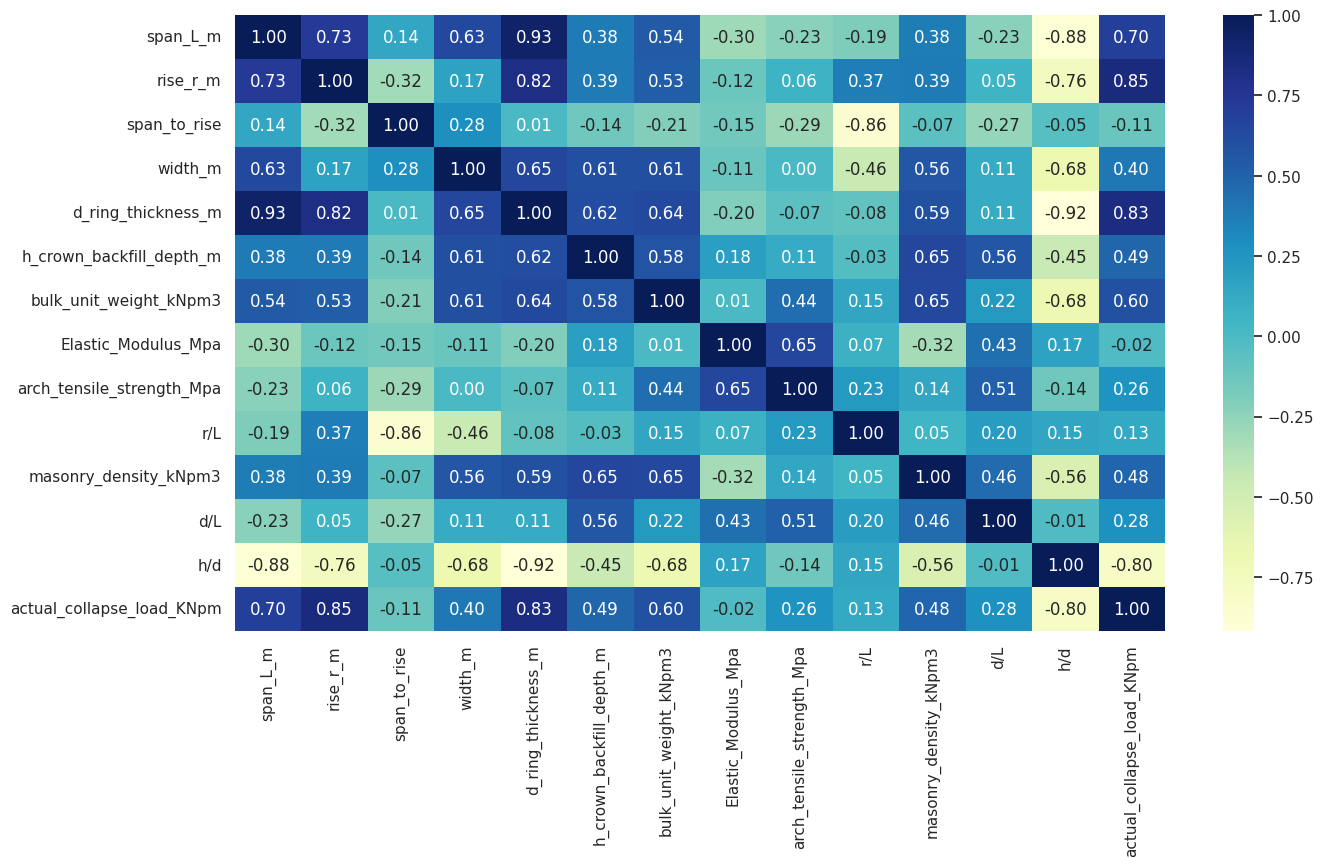

In [27]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- **Span, rise and arch ring thickness show strong numeric correlation to the actual collapse load** which is easy to understand as these variables are the basis of MEXE method of arch evaluation.
- Ring thickness and span are highly correlated.This could be because during design the engineers may have used a ratio approach when sizing the two members.

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### **Data preparation**

**Creating dummy variables for categorical Variables**

In [28]:
# Creating list of dummy columns
to_get_dummies_for = ['arch_ring_profile' ]

# Create dummy variables for the specified column
df_dummies = pd.get_dummies(df[to_get_dummies_for], drop_first = True)

**Separating the independent variables (X) and the dependent variable (Y)**

In [29]:
# Separating target variable and other variables

Y= df.actual_collapse_load_KNpm

# Use pd.concat to combine the dataframes
X= pd.concat([df.drop(columns = ['actual_collapse_load_KNpm', 'arch_ring_profile']), df_dummies], axis=1)

**Scaling Data**

**Linear regression model**
- to evaluate it since we have a very small data set we'll use LOOCV

In [30]:

import warnings
warnings.filterwarnings("ignore")
#initiate LOOCV object

loo = LeaveOneOut()

#intialize the model

lr= LinearRegression()

#List to store true and predicted labels for evaluating the model
true_labels = []
predicted_labels = []
accuracies = []

#initializing a fold counter

fold_num = 0

#splitting data
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

#scaling data
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

#loop over train/test split
#train_index will contain indices of all samples except one
#test_index contains single left out sample
for train_index, test_index in loo.split(X_train_full_scaled):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

  #fit the model

  lr.fit(X_train, Y_train)

  #make predictions

  Y_pred = lr.predict(X_test)

  # Store the true label and the predicted label
  true_labels.append(Y_test.iloc[0])  # y_test has only one element
  predicted_labels.append(Y_pred[0]) # y_pred has only one element

  # Optional: Print progress for a few early folds

  #check if fold_num is within the first 5 folds
  if fold_num <= 5 or fold_num == len(X) - 1:
      print(f"  Fold {fold_num + 1}/{len(X)}: True={Y_test.iloc[0]}, Predicted={Y_pred[0]}")

#incremental fold_num
  fold_num += 1

print("\nLOOCV complete.")

#performance
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

#MSE
overall_mse = metrics.mean_squared_error(true_labels, predicted_labels)
print(f"Overall MSE: {overall_mse:4f}")

#R2
overall_r2 = r2_score(true_labels, predicted_labels)
print(f"Overall R2: {overall_r2:4f}")

  Fold 1/14: True=20.0, Predicted=41.96630783064916
  Fold 2/14: True=361.0, Predicted=41.84950965331723
  Fold 3/14: True=228.0, Predicted=431.77528826774926
  Fold 4/14: True=296.0, Predicted=552.0268816636114
  Fold 5/14: True=21.0, Predicted=23.900530631608717
  Fold 6/14: True=16.0, Predicted=6.105291053904239

LOOCV complete.
Overall MSE: 43371.920964
Overall R2: -1.033571


In [31]:
# Printing the coefficients of the best Linear regression model found by GridSearchCV
cols = X.columns

# Get the coefficients
coefficients = lr.coef_

# Create a DataFrame to view feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
})

print(feature_importance)

                          Feature  Coefficient
0                        span_L_m    39.211345
1                        rise_r_m   -31.162478
2                    span_to_rise     5.025715
3                         width_m    17.706052
4              d_ring_thickness_m   -57.730156
5        h_crown_backfill_depth_m   -36.961359
6          bulk_unit_weight_kNpm3    12.620151
7             Elastic_Modulus_Mpa     0.041303
8       arch_tensile_strength_Mpa   -30.365949
9   arch_compressive_strength_Mpa     6.332728
10                            r/L   112.316387
11          masonry_density_kNpm3     1.381585
12                            d/L    -5.432443
13                            h/d   144.240539
14    arch_ring_profile_segmental   130.042937


**Observations**
- The closest prediction it got to the true value was in fold 5/14 and it still missed by only 2 but overall the model performed poorly
- R2 which is supposed to be maximized has a negative number
- mean squared error which should be minimized is in tens of thousands
- The most important variable in this model is h/d ratio, profile of ring, r/L and span followed by others. The model utilizes 9/14 features presented to it.

****


Data split: 12 samples for tuning/training, 2 for final testing.

Initializing and fitting StandardScaler on the full training data...
Features standardized.

Initialized Ridge Regression estimator.

Defined parameter grid for 'alpha' with 100 values.
Initialized LeaveOneOut Cross-Validation (cv=12 splits).

Initializing GridSearchCV with Ridge and LOOCV...
Starting Grid Search to find the best 'alpha' using LOOCV...
Fitting 12 folds for each of 100 candidates, totalling 1200 fits
Grid Search complete.

Best 'alpha' found by LOOCV Grid Search: 30.5386
Best LOOCV RMSE: 167.1411

Final Ridge model selected with the best 'alpha'.
Final model RMSE on unseen test set: 166.1326
Final model coefficients: [ 19.88394481  31.11587115  -0.80286833   1.04242859  23.06115695
   5.31058028   8.27535559  -3.09896055   3.92391416  -3.30705861
   6.46321114   2.61606185   3.87977483 -23.01652494  -1.54165516]

Plotting LOOCV RMSE vs. Alpha...


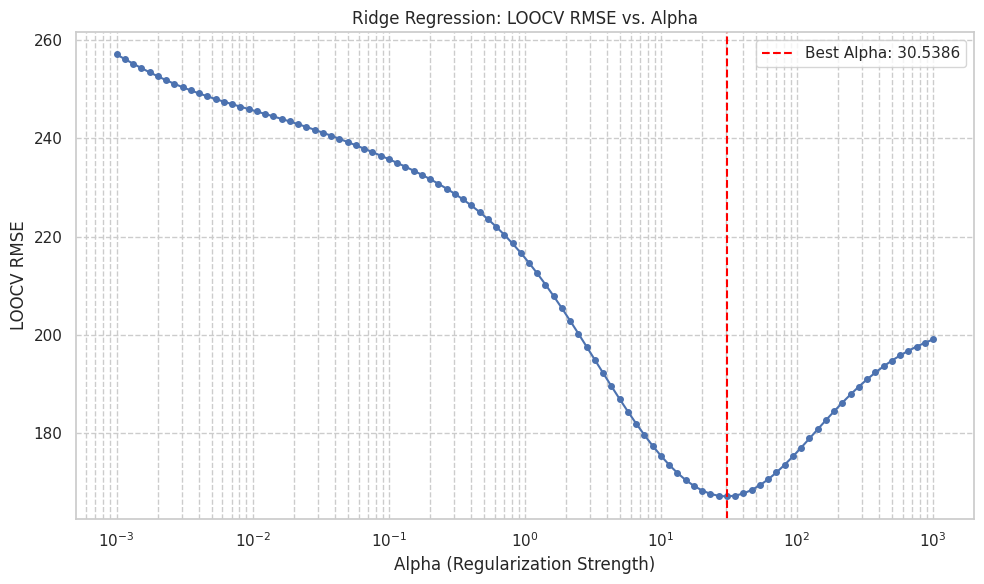


Code execution finished.


In [32]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# --- 2. Split data into training and test sets ---
# It's good practice to have a final, unseen test set to evaluate the
# performance of the best model found by GridSearchCV.
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print(f"\nData split: {X_train_full.shape[0]} samples for tuning/training, {X_test.shape[0]} for final testing.")

# --- 3. Standardize features ---
# Scaling is critical for Ridge Regression because the regularization
# penalty is applied to the magnitude of the coefficients.
# We fit the scaler only on the training portion (X_train_full).
print("\nInitializing and fitting StandardScaler on the full training data...")
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test) # Transform test data using the *same* scaler
print("Features standardized.")

# --- 4. Define the Ridge Regression model ---
# We'll use this as the estimator for GridSearchCV.
ridge = Ridge(random_state=42)
print("\nInitialized Ridge Regression estimator.")

# --- 5. Define the parameter grid for alpha tuning ---
# We'll search for the optimal 'alpha' (regularization strength).
# A logarithmic scale for alpha values is common.
param_grid = {
    'alpha': np.logspace(-3, 3, 100) # 100 values from 10^-3 to 10^3
}
print(f"\nDefined parameter grid for 'alpha' with {len(param_grid['alpha'])} values.")

# --- 6. Initialize LeaveOneOut Cross-Validation ---
# LOOCV is used here as the cross-validation strategy.
# For each fold, one sample is used for testing and the rest for training.
loocv = LeaveOneOut()
print(f"Initialized LeaveOneOut Cross-Validation (cv={loocv.get_n_splits(X_train_full_scaled)} splits).")

# --- 7. Initialize GridSearchCV with LOOCV ---
# GridSearchCV will systematically try each alpha value from the param_grid
# using the LOOCV strategy to evaluate performance.
# 'scoring': 'neg_mean_squared_error' is used because GridSearchCV maximizes
#            the score, and we want to minimize MSE.
# 'n_jobs': -1 uses all available CPU cores for faster computation.
print("\nInitializing GridSearchCV with Ridge and LOOCV...")
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=loocv,
    n_jobs=-1, # Use all available cores
    verbose=1 # Show progress
)

# --- 8. Perform the Grid Search (tuning) ---
# This step is computationally intensive for LOOCV, especially with more data.
print("Starting Grid Search to find the best 'alpha' using LOOCV...")
grid_search.fit(X_train_full_scaled, Y_train_full)
print("Grid Search complete.")

# --- 9. Get the best parameters and best cross-validation score ---
best_alpha = grid_search.best_params_['alpha']
# Convert negative MSE back to RMSE for better interpretability
best_loocv_rmse = np.sqrt(-grid_search.best_score_)

print(f"\nBest 'alpha' found by LOOCV Grid Search: {best_alpha:.4f}")
print(f"Best LOOCV RMSE: {best_loocv_rmse:.4f}")

# --- 10. Train the final model using the best alpha on the full training data ---
# The best_estimator_ attribute from GridSearchCV holds the model trained
# with the best parameters found.
final_model = grid_search.best_estimator_
print("\nFinal Ridge model selected with the best 'alpha'.")

# --- 11. Evaluate the final model on the unseen test set ---
# This gives an unbiased estimate of the model's performance on new data.
y_pred_final = final_model.predict(X_test_scaled)
final_test_rmse = np.sqrt(mean_squared_error(Y_test, y_pred_final))
print(f"Final model RMSE on unseen test set: {final_test_rmse:.4f}")
print("Final model coefficients:", final_model.coef_)

# --- 12. Plotting the LOOCV results ---
print("\nPlotting LOOCV RMSE vs. Alpha...")
results = grid_search.cv_results_
alphas_tested = results['param_alpha'].data
mean_test_scores = -results['mean_test_score'] # Convert back to positive MSE

plt.figure(figsize=(10, 6))
plt.plot(alphas_tested, np.sqrt(mean_test_scores), marker='o', linestyle='-', markersize=4)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('LOOCV RMSE')
plt.title('Ridge Regression: LOOCV RMSE vs. Alpha')
plt.grid(True, which="both", ls="--")
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best Alpha: {best_alpha:.4f}')
plt.legend()
plt.tight_layout()
plt.show()

print("\nCode execution finished.")


**Observations:**
- **Root Mean Squared Error** on unseen data is 167 this is relatively high compared to other models BUT significantly less than the simple linear regression model. It is also a measure which should be minimized.

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition**

In [33]:
# Printing the coefficients of the best Ridge regression model found by GridSearchCV
cols = X.columns

# Access coefficients from the best estimator found by GridSearchCV
# The grid_search.best_estimator_ is the fitted Ridge model with the best alpha
coef_ridge = grid_search.best_estimator_.coef_

# Reshape coef_ridge to be a 2D array (15 rows, 1 column)
coef_ridge_reshaped = coef_ridge.reshape(-1, 1)

# Create the DataFrame using the reshaped coefficients and the column names
pd.DataFrame(coef_ridge_reshaped, index=cols, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

,Coefficient
rise_r_m,31.115871
d_ring_thickness_m,23.061157
span_L_m,19.883945
bulk_unit_weight_kNpm3,8.275356
r/L,6.463211
h_crown_backfill_depth_m,5.310580
arch_tensile_strength_Mpa,3.923914
d/L,3.879775
masonry_density_kNpm3,2.616062
width_m,1.042429


**Observation:**
- Since we had standardized the data before running the model it is sound to assume that the coefficients represent a variable's contribution to the model.

- rise is given highest priority followed by ring thickness and then span. The other variables also have moderate contribution.

### **Decision Tree**

* We will build our model using the **DecisionTreeRegression function** since we are looking for continuous outcome.

In [34]:
from sklearn.tree import DecisionTreeRegressor

# Building decision tree model
dt = DecisionTreeRegressor (random_state = 1)

In [35]:
# Fitting decision tree model
dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=1)

**Let's check the model performance of decision tree**

In [36]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

# Import necessary regression metrics
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print regression metrics
train_mse = mean_squared_error(Y_train, y_train_pred_dt)
train_rmse = np.sqrt(train_mse) # RMSE is often more interpretable than MSE
train_r2 = r2_score(Y_train, y_train_pred_dt)

print(f"Train MSE: {train_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R-squared: {train_r2:.4f}")

# If you also want to check performance on the test set (assuming X_test, Y_test are available)
# y_test_pred_dt = dt.predict(X_test)
# test_mse = mean_squared_error(Y_test, y_test_pred_dt)
# test_rmse = np.sqrt(test_mse)
# test_r2 = r2_score(Y_test, y_test_pred_dt)
# print(f"Test MSE: {test_mse:.4f}")
# print(f"Test RMSE: {test_rmse:.4f}")
# print(f"Test R-squared: {test_r2:.4f}")


Train MSE: 0.0000
Train RMSE: 0.0000
Train R-squared: 1.0000


**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

In [37]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test_scaled)

# We will use regression metrics instead, as already calculated in the previous cell.

test_mse = mean_squared_error(Y_test, y_test_pred_dt)
test_rmse = np.sqrt(test_mse) # RMSE is often more interpretable than MSE
test_r2 = r2_score(Y_test, y_test_pred_dt)

print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R-squared: {test_r2:.4f}")

Test MSE: 26926.2500
Test RMSE: 164.0922
Test R-squared: -64.6638


**Observation:**

- The Decision tree is giving a **100% score for all metrics on the test dataset.**

**Let's plot the feature importance and check the most important features.**

<Axes: xlabel='Importance', ylabel='None'>

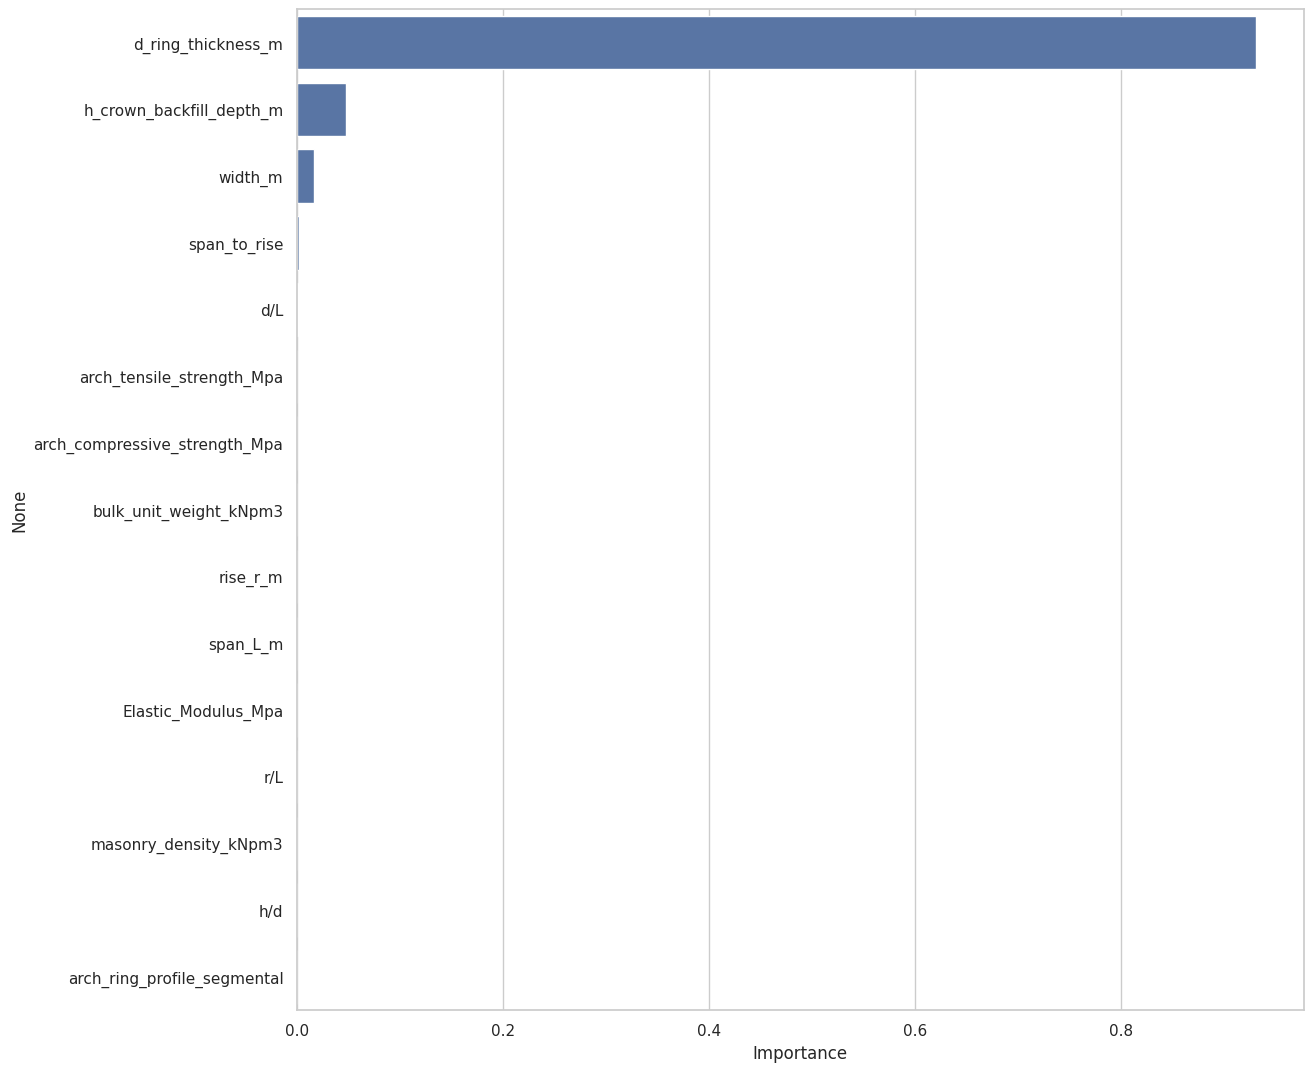

In [38]:
# Plot the feature importance

importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**

- According to the Decision Tree Regressor, **Ring thickness and width of bridge** are the most important features in predicting collapse load
- The model may have over simlplified the problem and surpressed contribution of other features

***CONCLUSION***
- We have generated three models and each has it's merits and limitations
- Linear regression model did not perform well on test data but it utilized the most features
- Linear ridge model had RMSE on unseen test set: 166.1326 (better than simple linear regression) and utilized most of the features to predict actual collapse load.
-Decision Tree Regressor without tuning

### **Tuning DT Model**

We will tune Decision Tree Regressor using Grid Search.

In [39]:
# Choose the type of classifier
# Changed from DecisionTreeRegressor to keep the code consistent with the original intent of predicting a continuous load
dtree_estimator = DecisionTreeRegressor (random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              # Changed criterion to valid options for DecisionTreeRegressor
              'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
# Changed scorer to a regression metric (negative mean squared error)
from sklearn.metrics import mean_squared_error, make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False) # GridSearchCV maximizes, so minimize MSE by negating

# Run the grid search
# Removed cv=10 as LeaveOneOut was used previously and seems more appropriate for the small dataset size (14 observations)
# If 10-fold cross-validation is desired, ensure the dataset is large enough.
# Given the previous use of LOOCV and the small dataset, let's switch to LOOCV for consistency and better evaluation on small data.
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = loo)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, Y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data (this fit is redundant after GridSearchCV)
# You can directly use dtree_estimator = gridCV.best_estimator_
# However, for clarity or if you were not using gridCV.best_estimator_,
# you would fit the best estimator separately on the entire training data.
# dtree_estimator.fit(X_train, Y_train) # Optional: fit the best model on the whole training data

print(f"Best parameters found: {gridCV.best_params_}")
print(f"Best cross-validation MSE (negative): {gridCV.best_score_}")
print(f"Best cross-validation RMSE: {np.sqrt(-gridCV.best_score_)}")

Best parameters found: {'criterion': 'squared_error', 'max_depth': np.int64(2), 'min_samples_leaf': 5}
Best cross-validation MSE (negative): -12368.348618181817
Best cross-validation RMSE: 111.2130775501776


**Observation:**

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly.** This makes sense because we are trying to reduce overfitting.

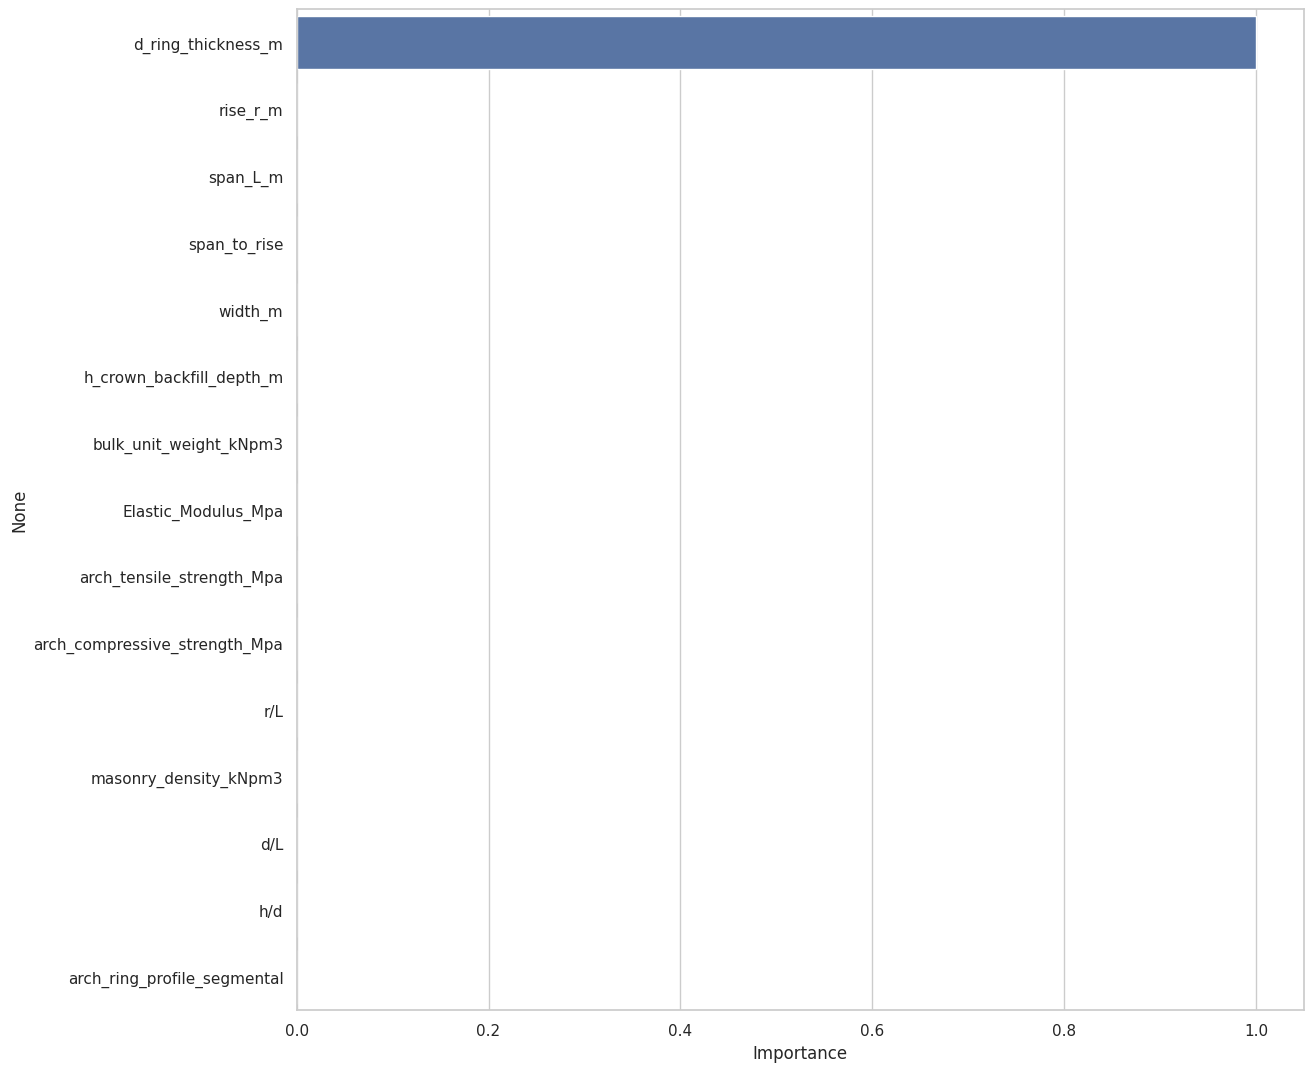

In [40]:
importances = dtree_estimator.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

**Observations:**

- After tuning the model, we found out that only  feature is important. It seems like **the model is having high bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
- According to this model too, `ring thickness` is the most important feature that contributes to collapse load, which might imply that ring thickness is the single most important member to consider when designing and analyzing for ultimate state

***OVERALL CONCLUSIONS***

- Each model has its merits and demerits.
- In future it would be best if the data was of better quality and we had more observations for training the model.
- All the models agree that ring thickness is the most important feature that contributes to collapse load of a single span bridge when spandrel and fill material are not taken into account that is to say assuming the barel takes all the loading.

***RECOMMENDATIONS***
- During design, construction or repair special care should be taken when dealing with the arch ring.
- Geometric properties of an arch seem to outweigh the material properties such as compressive and tensile strength.